In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA


In [2]:
raw=pd.read_csv(r'D:\ml\pca\Principal Component Analysis_Project\Dataset\houseprice.csv',index_col=0)

In [3]:
raw.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
 raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
print(raw.shape)

(1460, 80)


In [6]:
for feature in ['MSSubClass','OverallQual','OverallCond']:
    raw[feature]= raw[feature].astype('object')

In [7]:
current_year=int(dt.datetime.now().year)

In [8]:
buitage=current_year-raw.YearBuilt
reage=current_year-raw.YearRemodAdd

In [9]:
raw['buitage']=buitage
raw['reage']=reage

In [10]:
raw.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,buitage,reage
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,20,20
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,47,47
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,22,21
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,108,53
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,23,23


In [11]:
raw.shape

(1460, 82)

In [12]:
total=raw.isnull().sum().sort_values(ascending=False)
percentage=(raw.isnull().sum()*100/raw.isnull().count()).sort_values(ascending=False)
missing=pd.concat([total,percentage],axis=1,keys=['total','percent'])
missing

,total,percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000


In [13]:

# replace NA values in 'Alley' with a valid value, 'No alley access' 
raw['Alley'].fillna('No alley access' , inplace = True)

# 'MasVnrType' have 0.55% NA values, replace it with 'None'
raw['MasVnrType'].fillna('None' , inplace = True)

# use 'for' loop for filling NA values with 'No Basement' in the following 5 columns 
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    raw[col].fillna('No Basement' , inplace = True)

# replace NA values in 'Electrical' with its mode 'SBrkr'
raw['Electrical'].fillna('SBrkr' , inplace = True)

# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
raw['FireplaceQu'].fillna('No Fireplace' , inplace = True)

# use 'for loop' to replace NA values in the below columns with a valid value, 'No Garage' 
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    raw[col].fillna('No Garage' , inplace = True)

# replace NA values in 'PoolQC' with a valid value, 'No Pool'
raw['PoolQC'].fillna('No Pool' , inplace = True)

# replace NA values in 'Fence' with a valid value, 'No Fence'
raw['Fence'].fillna('No Fence' , inplace = True)

# replace NA values in 'MiscFeature' with a valid value, 'None'
raw['MiscFeature'].fillna('None' , inplace = True)

In [14]:
# 'LotFrontage' has 17.74% of missing values, Replace these with its median value
raw['LotFrontage'].fillna(raw['LotFrontage'].median() , inplace = True)

# 'MasVnrArea' have 0.55% missing values, replace it with its mode 0
raw['MasVnrArea'].fillna(0 , inplace = True)

# replace missing values in 'GarageYrBlt' with its mode 0
raw['GarageYrBlt'].fillna(0 , inplace = True)

In [15]:
raw.isnull().any().sum()

0

In [16]:
df_numeric_features = raw.select_dtypes(include=[np.number])
df_num = df_numeric_features.drop('SalePrice',axis=1)       

df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,buitage,reage
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,61,0,0,0,0,0,2,2008,20,20
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,5,2007,47,47
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,42,0,0,0,0,0,9,2008,22,21
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,35,272,0,0,0,0,2,2006,108,53
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,84,0,0,0,0,0,12,2008,23,23


In [17]:
df_num_std=StandardScaler().fit_transform(df_num)
print(df_num_std)

[[-0.22087509 -0.20714171  1.05099379 ...  0.13877749 -1.05099379
  -0.87866809]
 [ 0.46031974 -0.09188637  0.15673371 ... -0.61443862 -0.15673371
   0.42957697]
 [-0.08463612  0.07347998  0.9847523  ...  0.13877749 -0.9847523
  -0.83021457]
 ...
 [-0.1754621  -0.14781027 -1.00249232 ...  1.64520971  1.00249232
  -1.02402865]
 [-0.08463612 -0.08016039 -0.70440562 ...  1.64520971  0.70440562
  -0.53949344]
 [ 0.23325479 -0.05811155 -0.20759447 ...  0.13877749  0.20759447
   0.96256569]]


In [18]:
df_num_std.shape

(1460, 35)

In [19]:
cov_mat=np.cov(df_num_std.T)
print(cov_mat[0:5])

[[ 1.00068540e+00  3.04730891e-01  1.16765369e-01  8.34052140e-02
   1.78590896e-01  2.14513541e-01  4.24923323e-02  1.24183267e-01
   3.63721436e-01  4.14056133e-01  7.24376356e-02  3.74949923e-02
   3.68259672e-01  9.04047865e-02 -6.98377770e-03  1.80657531e-01
   4.72540062e-02  2.37002365e-01 -4.90803219e-03  3.20737339e-01
   2.33380490e-01  9.92638352e-02  2.69723997e-01  3.23732664e-01
   7.55938857e-02  1.37107470e-01  1.02942634e-02  6.19876851e-02
   3.76808863e-02  1.80942511e-01 -2.55539426e-04  1.04578463e-02
   6.38480650e-03 -1.16765369e-01 -8.34052140e-02]
 [ 3.04730891e-01  1.00068540e+00  1.42374034e-02  1.37978777e-02
   1.03391322e-01  2.14249877e-01  1.11245941e-01 -2.62015458e-03
   2.61011910e-01  2.99679839e-01  5.10208941e-02  4.78224538e-03
   2.63296507e-01  1.58262930e-01  4.80785014e-02  1.26117008e-01
   1.42692420e-02  1.19771944e-01 -1.77960596e-02  1.90145014e-01
   2.71550003e-01  7.26485272e-02  1.54976888e-01  1.80526403e-01
   1.71815369e-01  8.4831

In [20]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [ 7.02177050e+00+0.00000000e+00j  3.31255010e+00+0.00000000e+00j
  2.62014342e+00+0.00000000e+00j  1.89709198e+00+0.00000000e+00j
  1.49734667e+00+0.00000000e+00j  9.99263899e-02+0.00000000e+00j
  1.36214989e-01+0.00000000e+00j  1.95108720e-01+0.00000000e+00j
  2.13950778e-01+0.00000000e+00j  3.01103966e-01+0.00000000e+00j
  3.54408421e-01+0.00000000e+00j  4.01613912e-01+0.00000000e+00j
  1.27323863e+00+0.00000000e+00j  5.45571325e-01+0.00000000e+00j
  5.57495391e-01+0.00000000e+00j  6.14455332e-01+0.00000000e+00j
  6.53106933e-01+0.00000000e+00j  6.65210391e-01+0.00000000e+00j
  1.17628474e+00+0.00000000e+00j  7.70438353e-01+0.00000000e+00j
  7.98982584e-01+0.00000000e+00j  8.42159693e-01+0.00000000e+00j
  8.54295919e-01+0.00000000e+00j  1.12605403e+00+0.00000000e+00j
  1.11386919e+00+0.00000000e+00j  9.17108768e-01+0.00000000e+00j
  1.06812304e+00+0.00000000e+00j  1.04387620e+00+0.00000000e+00j
  9.58644771e-01+0.00000000e+00j  1.01349985e+00+0.00000000e+00j
  9.8034

In [21]:
eig_val=list(eig_val)

In [22]:
eig_val.sort(reverse=True)
print(eig_val)

[(7.021770499413531+0j), (3.3125501041720895+0j), (2.6201434201098297+0j), (1.8970919779158206+0j), (1.497346674755538+0j), (1.2732386321496971+0j), (1.1762847353254333+0j), (1.1260540287787297+0j), (1.113869190266069+0j), (1.0681230423123227+0j), (1.043876201199527+0j), (1.01349985477382+0j), (0.9803440369826908+0j), (0.9586447711070978+0j), (0.9171087678623903+0j), (0.8542959189393454+0j), (0.842159692747254+0j), (0.7989825842753201+0j), (0.7704383525332139+0j), (0.6652103910693319+0j), (0.6531069328251308+0j), (0.614455331726777+0j), (0.5574953911006544+0j), (0.5455713249726756+0j), (0.40161391207370595+0j), (0.3544084205249463+0j), (0.30110396633614805+0j), (0.21395077836552578+0j), (0.1951087197992314+0j), (0.13621498924662287+0j), (0.09992638992418315+0j), (3.9607802649942513e-16+0j), (4.589253872577405e-17+0j), (-2.2654053538404493e-16+9.87708656212518e-18j), (-2.2654053538404493e-16-9.87708656212518e-18j)]


C:\Users\SAYYA\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


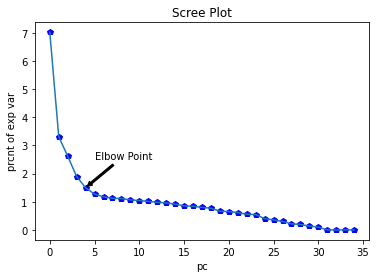

In [23]:
plt.plot(eig_val,'bp')
plt.plot(eig_val)
plt.xlabel('pc')
plt.ylabel('prcnt of exp var')
plt.annotate(text ='Elbow Point', xy=(4,1.5), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))
plt.title('Scree Plot')

plt.show() 

In [24]:
eigenvec= eig_vec[:,0:5]
eigenvec

array([[-0.15734148+0.j, -0.0814686 +0.j, -0.22587062+0.j,
        -0.10722212+0.j,  0.00752845+0.j],
       [-0.10597576+0.j, -0.04682612+0.j, -0.26517756+0.j,
         0.01500761+0.j,  0.00786312+0.j],
       [-0.25598505+0.j,  0.25193829+0.j,  0.22644764+0.j,
         0.03246855+0.j, -0.04820808+0.j],
       [-0.23277906+0.j,  0.15445072+0.j,  0.2753199 +0.j,
         0.01428159+0.j, -0.26832427+0.j],
       [-0.1912835 +0.j, -0.00691731+0.j, -0.04663417+0.j,
         0.02642127+0.j,  0.07848375+0.j],
       [-0.14599174+0.j,  0.21408979+0.j, -0.34881371+0.j,
         0.2640932 +0.j, -0.14572962+0.j],
       [ 0.00973451+0.j,  0.03635902+0.j, -0.17643327+0.j,
         0.08698812+0.j,  0.03447938+0.j],
       [-0.10716365+0.j, -0.12447427+0.j,  0.17122358+0.j,
        -0.56562785+0.j,  0.04965918+0.j],
       [-0.25613609+0.j,  0.11057602+0.j, -0.25506258+0.j,
        -0.26315384+0.j, -0.08881146+0.j],
       [-0.25253012+0.j,  0.03831097+0.j, -0.30414927+0.j,
        -0.28994057+0.j

In [25]:
df_pca = pd.DataFrame(df_num_std.dot(eigenvec), columns= ['PC1','PC2','PC3','PC4','PC5'])

df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.571468+0.000000j,0.233699+0.000000j,1.586585+0.000000j,2.219473+0.000000j,-0.715615+0.000000j
1,-0.199890+0.000000j,0.835867+0.000000j,-1.050234+0.000000j,-0.097077+0.000000j,0.627275+0.000000j
2,-1.740971+0.000000j,0.251788+0.000000j,1.391157+0.000000j,1.637273+0.000000j,-0.046151+0.000000j
3,1.470652+0.000000j,-1.877190+0.000000j,-1.515307+0.000000j,0.180157+0.000000j,1.837106+0.000000j
4,-4.216754+0.000000j,-1.116376+0.000000j,0.533713+0.000000j,1.621483+0.000000j,0.334647+0.000000j


In [27]:
df_pca.shape

(1460, 5)

In [28]:
pca=PCA(n_components=5,random_state=0)
pc=pca.fit_transform(df_num_std)

In [30]:
PCA_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2','PC3','PC4','PC5'])

PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.571352,-0.240622,-1.586777,-2.241474,0.753565
1,0.199709,-0.835527,1.042285,0.089567,-0.634687
2,1.741028,-0.250540,-1.389540,-1.627933,0.038217
3,-1.470503,1.871470,1.526313,-0.195221,-1.759654
4,4.216874,1.125024,-0.532845,-1.588267,-0.391245
